[View in Colaboratory](https://colab.research.google.com/github/namratabiswas/Machine_Learning/blob/master/Neural_network_regression.ipynb)

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
X_data = np.linspace(0,10,1000000)

In [0]:
noise = np.random.randn(len(X_data))  # we are going to add some noise to the data

In [5]:
noise

array([ 0.11002781,  1.66562336, -1.16154094, ..., -0.56502626,
       -0.26529172,  0.2789977 ])

y = mx + b

 b = 5

In [0]:
# lets choose random slope = 0.5

y_true = (0.5 * X_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data=X_data,columns=['X Data'])

In [0]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
y_df.head()

,Y
0,5.110028
1,6.665628
2,3.838469
3,3.841570
4,2.434177


In [0]:
# Creating my_data by concatenating x_df and y_df

my_data = pd.concat([x_df,y_df],axis=1)

In [11]:
my_data.head()

,X Data,Y
0,0.00000,5.110028
1,0.00001,6.665628
2,0.00002,3.838469
3,0.00003,3.841570
4,0.00004,2.434177


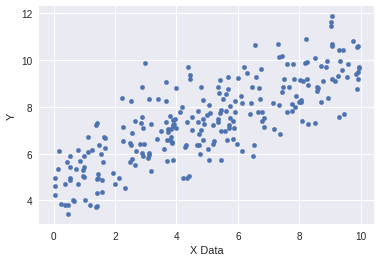

In [51]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [0]:
# Next I divide the data into batces as we have 1000000 data points

batch_size = 8

In [53]:
# Now I generate 2 tensorflow variables that is m(slope) and b(intercept) using random numbers

np.random.randn(2)

array([1.41776402, 0.57339639])

In [0]:
m = tf.Variable(1.4)

In [0]:
b = tf.Variable(0.5)

In [0]:
# Now I create the placeholders

xph = tf.placeholder(tf.float32,[batch_size])

In [0]:
yph = tf.placeholder(tf.float32,[batch_size])


In [0]:
y_model = (m * xph) + b

In [0]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
# Now I initialize the global variables

init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  
  sess.run(init)
  
  batches = 1000
  
  for i in range(batches):
    
    rand_ind = np.random.randint(len(X_data),size = batch_size)  # I am taking 10 random data points from the X-data
    
    feed = {xph:X_data[rand_ind],yph: y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])
    

    

In [63]:
model_m


0.50453496

In [64]:
model_b

4.849695

In [0]:
#So we can see that the values are preety close to what I had set them in the beginning

In [0]:
y_hat = (model_m * X_data) + model_b

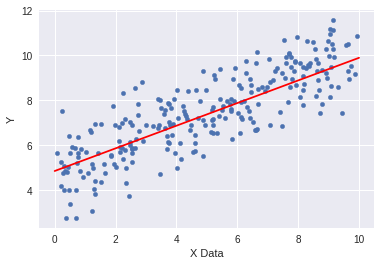

In [67]:
my_data.sample(250).plot(kind='scatter', x="X Data", y= 'Y')
plt.plot(X_data,y_hat,'r')


In [0]:
###

TF Estimator

In [0]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [70]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpnh1v3942', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd66f9d90f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_data,y_true,test_size=0.3,random_state=101)

In [73]:
x_train.shape

(700000,)

In [74]:
x_test.shape

(300000,)

In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [0]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [90]:
estimator.train(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnh1v3942/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpnh1v3942/model.ckpt.
INFO:tensorflow:loss = 4.6952286, step = 1001
INFO:tensorflow:global_step/sec: 600.162
INFO:tensorflow:loss = 6.4961405, step = 1101 (0.174 sec)
INFO:tensorflow:global_step/sec: 672.618
INFO:tensorflow:loss = 4.4179945, step = 1201 (0.144 sec)
INFO:tensorflow:global_step/sec: 713.609
INFO:tensorflow:loss = 13.046705, step = 1301 (0.145 sec)
INFO:tensorflow:global_step/sec: 719.313
INFO:tensorflow:loss = 6.037462, step = 1401 (0.134 sec)
INFO:tensorflow:global_step/sec: 735.647
INFO:tensorflow:loss = 13.022991, step = 1501 (0.143 sec)
INFO:tensorflow:global_step/sec: 726.854
INFO:tensorflow:loss = 4.5814

In [91]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-13-01:21:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnh1v3942/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-13-01:21:24
INFO:tensorflow:Saving dict for global step 2000: average_loss = 0.9901565, global_step = 2000, label/mean = 7.5206375, loss = 7.921252, prediction/mean = 7.4910803
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200

In [92]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-13-01:21:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnh1v3942/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-13-01:21:35
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0113261, global_step = 2000, label/mean = 7.484307, loss = 8.090609, prediction/mean = 7.4723926
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000

In [93]:
print("TRAINING DATA METRIC")
print(train_metrics)

TRAINING DATA METRIC
{'average_loss': 0.9901565, 'label/mean': 7.5206375, 'loss': 7.921252, 'prediction/mean': 7.4910803, 'global_step': 2000}


In [94]:
print("TEST DATA METRIC")
print(test_metrics)

TEST DATA METRIC
{'average_loss': 1.0113261, 'label/mean': 7.484307, 'loss': 8.090609, 'prediction/mean': 7.4723926, 'global_step': 2000}


In [0]:
brand_new_data = np.linspace(0,10,10)

In [0]:
input_func_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [101]:
list(estimator.predict(input_fn=input_func_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnh1v3942/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.903712], dtype=float32)},
 {'predictions': array([5.478425], dtype=float32)},
 {'predictions': array([6.0531383], dtype=float32)},
 {'predictions': array([6.6278515], dtype=float32)},
 {'predictions': array([7.2025642], dtype=float32)},
 {'predictions': array([7.7772775], dtype=float32)},
 {'predictions': array([8.351991], dtype=float32)},
 {'predictions': array([8.926704], dtype=float32)},
 {'predictions': array([9.501417], dtype=float32)},
 {'predictions': array([10.07613], dtype=float32)}]

In [102]:
predictions = []

for pred in estimator.predict(input_fn=input_func_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnh1v3942/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


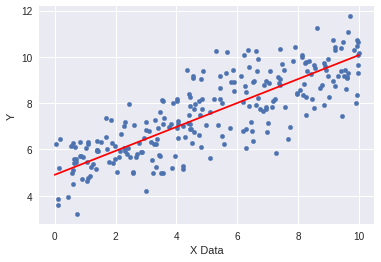

In [103]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y= 'Y')
plt.plot(brand_new_data,predictions,'r')